**Resampling Methods**

[ISLR Chapter 5](https://link.springer.com/chapter/10.1007/978-1-4614-7138-7_5)

This involves repeated drawing samples from a training set and refitting a model of interest on each sample to obtain additional info about the fitted model. One example is for estimating the variability of a linear regression fit:
- Repeatedly draw different samples from the training data
- Fit a linear regression to each new sample
- Then examine the extent to which the resulting fits differ
This allows us to obtain info that wouldn't be available from fitting the model only once using the original training sample.

Resampling approaches can be computationally expensive, but computing power currently makes resampling less prohibitive. Two of the most common methods are *cross-validation* and *bootstrap*.

**Cross-validation**:
Estimate the test error associated with a given statistical learning method for model assessment (process of evaluating a model's performance) and model selection (select appropriate level of flexibility)

**Bootstrap**:
Used in several contexts, most commonly to provide a measure of accuracy of a parameter estimate or of a given statistical learning method.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Code formatting Jupyter black
%load_ext nb_black

<IPython.core.display.Javascript object>

[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

[quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)

# Cross-Validation

Remember that there's a distinction between the *test error rate* and the *training error rate* (discussed in Chapter 2.

In Chapter 6, they discuss how to make a mathematical adjustment ot the training error rate in order to estimate the error rate. Here, they estimate the test error rate by *holding out* a subset of the training observations from the fitting process.

In sections 5.1.1-5.1.4, they look at an example of performing regression with a quantitative response. In Section 5.1.5, they consider the case of classification with a qualitative response.

## The validation set approach

This is just holding out a set of data (e.g. using train_test_split from scikit-learn).

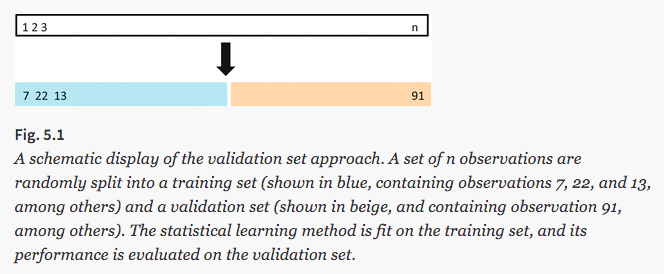

The resulting validation set error-rate--typically assessed using MSE (mean squared error) in the case of a quantitative response--provides an estimate of the test error rate.

The `Auto` dataset can be used to illustrate the validation set approach. From Chapter 3, we saw that there was a non-linear relationship between `mpg` and `horsepower`, and that a model that predicts `mpg` using `horsepower` and `horsepower`^2 gives better results than a model that uses only a linear term. It's natural to wonder if higher-order fits could give even better results. One way to approach this is by looking at the p-values associated with a cubic-term and higher-order polynomial terms in linear regression. The other approach is using the validation method.

The validation set error rates that result from fitting various regression models on the training sample and evaluating their performance on the validation sample, using MSE as a measure of validation set error, are shown in the left-hand panel of Figure 5.2.

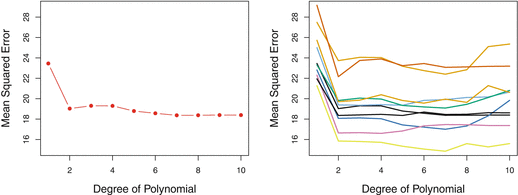

The validation set MSE for the quadratic fit is considerably smaller than for the linear fit. However, the validation set MSE for the cubic fit is actually slightly larger than for the quadratic fit. This implies that including a cubic term in the regression does not lead to better prediction than simply using a quadratic term.

The right side shows 10 different ways of splitting into training and validation. They all show that the quadratic term is the lowest but they each have a different baseline MSE.

The validation set approach is conceptually simple and easy to implement, but it has two potential drawbacks:

1. As shown on the right panel of figure 5.2, the validation estimate of the test error rate can be highly variable, depending on precisely which observations are included in the training set versus validation set.

2. In the validation approach, only a subset of the observations--those that are included in the training set rather than in the validation set--are used to fit the model. Since statistical methods tend to perform worse when trained on *fewer* observations, this suggests that the validation set error rate may tend to *overestimate* the test error rate for the model fit on the entire data set.

In the coming sections, we will present *cross-validation*, a refinement of the validation set approach that addresses these two issues.


## Leave-One-Out Cross-Validation

Leave-one-out cross-validation (LOOCV) is closely related to the validation set approach of Section 5.1.1, but it attempts to address that method’s drawbacks.

Only leaves one sample out as the test. You can therefore get an error with the model for that single observation that was left out.

$MSE_1 = (y_1 - \hat{y}_1)^2$

Do this for all individual samples and you're LOOCV estimate for the test MSE is the average of these n test error estimates:

$CV_{(n)} = \frac{1}{n}\sum_{i=1}^nMSE_i$


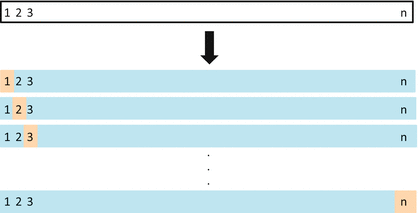

*Fig. 5.3. A schematic display of LOOCV. A set of n data points is repeatedly split into a training set (shown in blue) containing all but one observation, and a validation set that contains only that observation (shown in beige). The test error is then estimated by averaging the n resulting MSE’s. The first training set contains all but observation 1, the second training set contains all but observation 2, and so forth.*

Advantages of LOOCV over cross-validation:
1. Far less bias
    - the training set is most of the data
    - LOOCV tends not to overestimate the test error rate as much as the validation set approach
2. No randomness like in the split of cross-validation
    - results will always be the same


LOOCV is a very general method, and can be used with any kind of predictive modeling. For example we could use it with logistic regression or linear discriminant analysis, or any of the methods discussed in later chapters. 

scikit-learn implementation of LOOCV:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

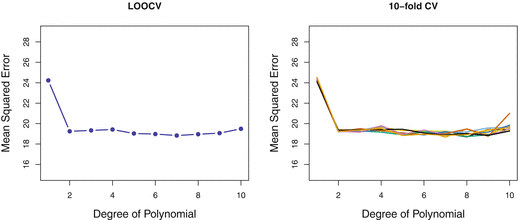

*Figure 5.4. Cross-validation was used on the Autodata set in order to estimate the test error that results from predicting mpgusing polynomial functions of horsepower. Left: The LOOCV error curve. Right: 10-fold CV was run nine separate times, each with a different random split of the data into ten parts. The figure shows the nine slightly different CV error curves.*

## k-fold cross-validation

An alternative to LOOCV is k-fold CV. This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds. The mean squared error, MSE1, is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error, MSE1, MSE2, …, MSE k . The k-fold CV estimate is computed by averaging these values,

$CV_{k} = \frac{1}{k}\sum_{i=1}^k MSE_i$


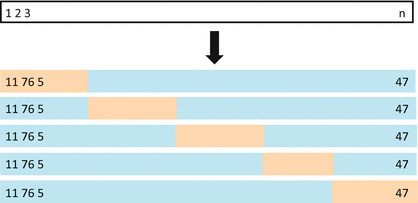

*Figure 5.5. A schematic display of 5-fold CV. A set of n observations is randomly split into five non-overlapping groups. Each of these fifths acts as a validation set (shown in beige), and the remainder as a training set (shown in blue). The test error is estimated by averaging the five resulting MSE estimates.*

This is like LOOCV. What are the advantages of using k=5 or k=10?
- Computational. Fewer times to fit.
- It can apply to almost any statistical learning method.
- Later, we'll see that there's also an advantage in terms of bias-variance tradeoff.

From right panel of Figure 5.4, we see some variability but it is still lower than in just the single-validation set approach.

When we examine real data, we do not know the true test MSE, and so it is difficult to determine the accuracy of the cross-validation estimate. However, if we examine simulated data, then we can compute the true test MSE, and can thereby evaluate the accuracy of our cross-validation results.

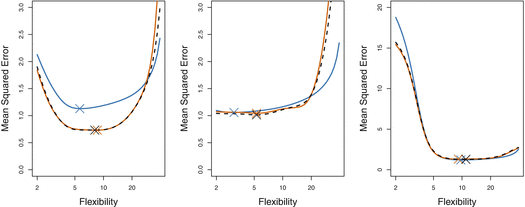

*True and estimated test MSE for the simulated data sets in Figures  2.9 ( left ), 2.10 ( center ), and 2.11 ( right ). The true test MSE is shown in blue, the LOOCV estimate is shown as a black dashed line, and the 10-fold CV estimate is shown in orange. The crosses indicate the minimum of each of the MSE curves.*

## Bias-Variance Trade-Off for k-Fold Cross-Validation

A less obvious but potentially more important advantage of k-fold CV is that it often gives more accurate estimates of the test error rate than does LOOCV. This has to do with a bias-variance trade-off.

Bias consideration
- Validation set approach lead to overestimates of the test error rate (a **biased** estimate)
- On the other hand, LOOCV **unbiased** estimates of the test error rate
- k-fold CV gives an **intermediate bias**

Variance consideration
- LOOCV has a higher variance than k-fold CV. Why?
    - With LOOCV, we're averaging the outputs of n fitted models, and the outputs are highly correlated with each other
    - (**revisit this**) The mean of many highly correlated quantities has higher variance, than mean of many less correlated quantities. Therefore LOOCV tends to have higher variance than does the test error estimate resulting from k-fold CV.
 


# [bottom of notebook]